# Calculate and plot a TERS image

Here, we test the new aims implementation of periodic TERS on the simple case of benzene.

In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

import ase.io
import finite_field_ters as ffters

In [2]:
plt.style.use('seaborn-v0_8-darkgrid')

## Read in calculation data

After using the `ffters` module to set up the directory tree and (optionally) run the single points, it can be used to analyze the obtained data in a straightforward fashion as follows.

In [11]:
ters = ffters.analyze_2d_ters(working_dir=Path('./data'), efield=1.0e-1, dq=5.0e-3, nbins=(10, 10), periodic=False, use_groundstate=False, no_groundstate_dir=Path('./data/no_nearfield/'))

In [17]:
# scanning range of the TERS calculation
ex = np.array([-5.0, 5.0, -5.0, 5.0])

## Plot tip-position-dependent dipoles with and without the field and for positive and negative mode displacements

The dipoles are output by FHI-aims, where they were calculated by solving the electronic problem with the Hamiltonian

$$
\hat{H}
=
\hat{H}_0 + \hat{\Phi}_0(\mathbf{R}^\mathrm{tip}) + E_z \left[ -\hat{\mu}_z + \frac{\partial}{\partial E_z} \hat{\Phi}(\omega_0; \mathbf{R}^\mathrm{tip}) \right].
$$
(for details refer to Litman et al, J. Phys. Chem. Lett., 2023 https://pubs.acs.org/doi/10.1021/acs.jpclett.3c01216).

In this example, we rely on the presumption that the ground state Hartree potential does not contribute to the image and, 
therefore, the zero-field panels only contain the dipole of the displaced structure with no position dependence.

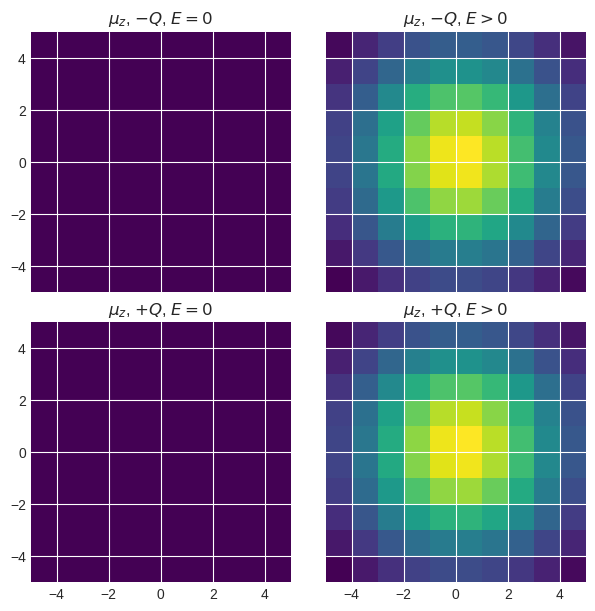

In [18]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(6, 6), sharex=True, sharey=True, constrained_layout=True)

ax[0, 0].imshow(ters['dipole0'][0], extent=ex, origin='lower', cmap='viridis')
ax[0, 0].set_title(r'$\mu_z$, $-Q$, $E=0$')

ax[0, 1].imshow(ters['dipole'][0], extent=ex, origin='lower', cmap='viridis')
ax[0, 1].set_title(r'$\mu_z$, $-Q$, $E>0$')

ax[1, 0].imshow(ters['dipole0'][1], extent=ex, origin='lower', cmap='viridis')
ax[1, 0].set_title(r'$\mu_z$, $+Q$, $E=0$')

ax[1, 1].imshow(ters['dipole'][1], extent=ex, origin='lower', cmap='viridis')
ax[1, 1].set_title(r'$\mu_z$, $+Q$, $E>0$')

plt.show()

## Plot $zz$-polarizabilities

These are calculated numerically from
$$
\alpha_{zz}^\mathrm{local}(\mathbf{R}^\mathrm{tip}) 
= 
\frac{\partial \mu_z(\mathbf{R}^\mathrm{tip})}{\partial E_z}
\approx
\frac{\mu_z(E_z, \mathbf{R}^\mathrm{tip}) - \mu_z(0, \mathbf{R}^\mathrm{tip})}{E_z}
$$
for both displaced structures separately.

This calculation is performed inside `ffters.analyze_2d_grid(...)`, have a look inside for details.

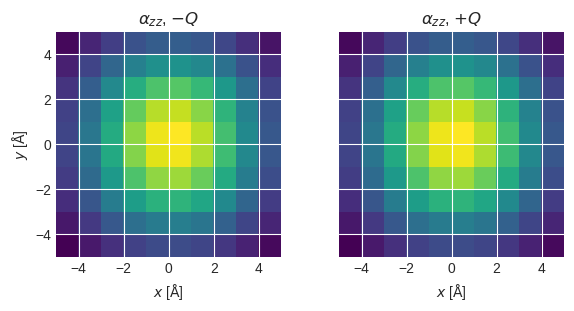

In [19]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(6, 3), sharex=True, sharey=True, constrained_layout=True)

ax[0].imshow(ters['alpha'][0], extent=ex, origin='lower', cmap='viridis')
#plot_numbers(ters['alpha'][0], 4, 5, ax[0])
#ax[0].contour(alpha_neg.T, extent=ex)
ax[0].set_title(r'$\alpha_{zz}$, $-Q$')
ax[1].imshow(ters['alpha'][1], extent=ex, origin='lower', cmap='viridis')
#plot_numbers(ters['alpha'][1], 4, 5, ax[1])
#ax[1].contour(alpha_pos.T, extent=ex)
ax[1].set_title(r'$\alpha_{zz}$, $+Q$')

ax[0].set_xlabel(r'$x$ [$\mathrm{\AA}$]')
ax[0].set_ylabel(r'$y$ [$\mathrm{\AA}$]')
ax[1].set_xlabel(r'$x$ [$\mathrm{\AA}$]')

plt.show()

## Plot the change of polarizability with normal-mode displacement

This is just an intermediate quantity
$$
\frac{\partial \alpha_{zz}^\mathrm{local}(\mathbf{R}^\mathrm{tip})}{\partial Q_\omega}
\approx
\frac{\alpha_{zz}^\mathrm{local}(+\Delta Q_\omega; \mathbf{R}^\mathrm{tip}) - \alpha_{zz}^\mathrm{local}(-\Delta Q_\omega; \mathbf{R}^\mathrm{tip})}{2\Delta Q_\omega},
$$
however it is often useful to look at it, because it often displays interesing symmetries and deviations above and below zero, which is especially interesting for antisymmetric vibrations.

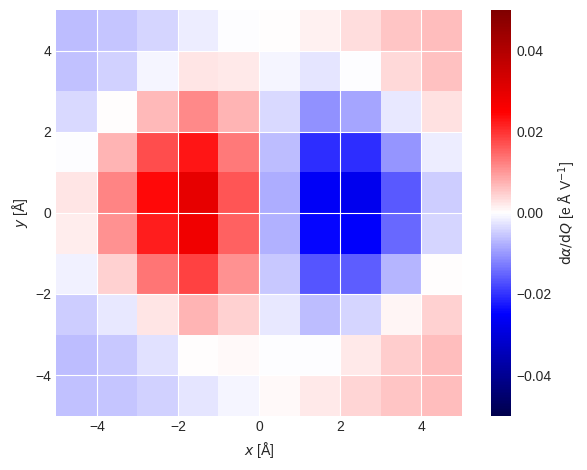

In [20]:
plt.imshow(ters['d(alpha)/dQ'], cmap='seismic', origin='lower', vmin=-5e-2, vmax=5e-2, extent=ex)
plt.colorbar(label=r'$\mathrm{d}\alpha / \mathrm{d}Q$ [e $\mathrm{\AA}$ V$^{-1}$]')
plt.xlabel(r'$x$ [$\mathrm{\AA}$]')
plt.ylabel(r'$y$ [$\mathrm{\AA}$]')
plt.tight_layout()

plt.show()

## Plot the TERS image

Finally, we can have a look at the Raman intensity as a function of the tip position (this is known as a "TERS image").
This is nothing else than the square of the previous quantity
$$
I_\mathrm{Raman}(\omega, \mathbf{R}^\mathrm{tip})
\propto
\left( \frac{\partial \alpha_{zz}^\mathrm{local}(\mathbf{R}^\mathrm{tip})}{\partial Q_\omega} \right)^2.
$$

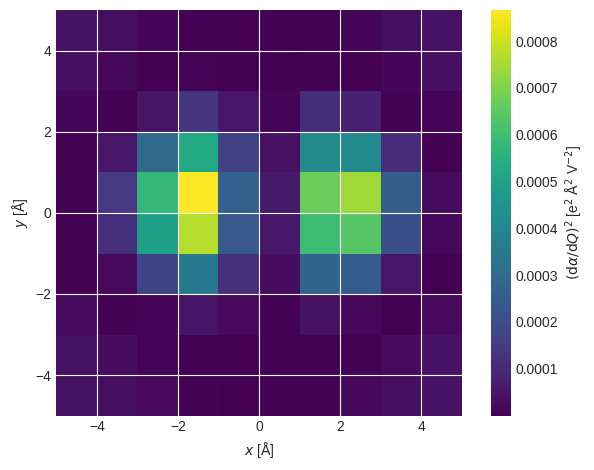

In [21]:
plt.imshow(ters['intensity'], origin='lower', extent=ex, cmap='viridis')
plt.colorbar(label=r'$(\mathrm{d}\alpha / \mathrm{d}Q)^2$ [e$^2$ $\mathrm{\AA}^2$ V$^{-2}$]')
plt.xlabel(r'$x$ [$\mathrm{\AA}$]')
plt.ylabel(r'$y$ [$\mathrm{\AA}$]')
plt.tight_layout()
plt.show();